# Empirical Data Inference
Infer evolutionary parameters from empirical data with the ensemble density estimators.

In [1]:
import torch
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from model.simulator import simulate
from utils import get_ensemble_predictions, calc_stats, sbi_post, get_mode_and_hdi, grab_short_sumstat, grab_long_sumstat, grab_man_sumstat
from model.params import readable_prior as prior 
from plotting import plot_from_post, set_plots_size_params, compare_posts, short_sumstats_plot, compare_posts_across_lines
set_plots_size_params(20)
# !pip install sbi==0.17.0

In [2]:
rename_dict = {'mu': r'Mutation rate (U)', 'w_ada': r'Beneficial fitness effect ($w_{b}$)', 
               'w_syn': r'Syn fitness effect ($w_{s}$)', 
               'w_non_syn': r'Non-syn fitness effect ($w_{ns}$)', 'p_ada_non_syn': r'Beneficial non-syn probability ($p_{bns}$)',
               'p_ada_syn': r'Beneficial syn probability ($p_{bs}$)', 'p0_non_syn': r'Mean initial non-syn ($M_{ns}$)', 
               'p0_syn': r'Mean initial syn ($M_{s}$)',
               'w_penalty': r'Initial log-fitness correlation ($\delta$)', 'epistasis_boost': r'Epistasis effect ($\eta$)'}


In [3]:
def infer_and_plot(ensemble_path, input_data, man_sumstat, syn_prob, sumstats_to_simulate=10,
                   plot_hdi=True, plot_short_PPC=True, plot_long_PPC=True, plot_freqs=True, samples_per_model=200):
    post, stats = get_ensemble_predictions(ensemble_path, input_data, None, prior, samples_per_model=samples_per_model)
    print(stats[stats.model=='ensemble'])
    post = post.rename(columns=rename_dict)
    post = post[rename_dict.values()]
    simulated_data = plot_from_post(post, stats, man_sumstat, num_of_samples=sumstats_to_simulate, syn_prob=syn_prob,
                                    plot_hdi=plot_hdi, plot_short_PPC=plot_short_PPC, plot_freqs=plot_freqs,
                                    plot_long_PPC=plot_long_PPC)
    return post, stats, simulated_data


In [4]:
# EB=1 --> no epistasis!, 0<EB<1 --> weak negative, EB<0 --> sign epistasis!
# PP=0 --> P0 muts are neutral, PP=1 --> P0 muts are not as deleterious as the rest of the muts

In [5]:
loop_coding = {}
loop_coding_short = {}
loop_coding_man = {}

def grab_long(sumstat):
    return sumstat[:204]

def grab_short(sumstat):
    return sumstat[:6]

def grab_man(sumstat):
    return np.concatenate((sumstat[:6],sumstat[204:]))

line_replica = {1: 'A', 2: 'B', 3: 'C'}

for i in range(1,4):
    total_coding_sumstat = torch.load(join('data_analysis', f'line{i}_total_sumstat.pt'))
    loop_coding[line_replica[i]] = grab_long(total_coding_sumstat)
    loop_coding_man[line_replica[i]] = grab_man(total_coding_sumstat)
    loop_coding_short[line_replica[i]] = grab_short(total_coding_sumstat)

syn_prob = 0.278

In [6]:
def get_ensemble_path(errs, replica, sumstat_type):
    return join('density_estimators', f'{errs} error rate', 'ensembles', replica, sumstat_type)

def get_ensemble_path_double_passage(replica):
    return join('model', 'all_double_passage', 'trained_nets_with_errs_2', replica, 'L-LR')


# LR Inference

In [7]:
inf_LR = {}

In [8]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.386500 -1.498280e+00  1.132413    0.227216  -0.816606  \
1            w_syn  0.915500  5.268619e-01  1.015573    0.999848   0.786101   
2        w_non_syn  0.689000  2.226599e-01  0.754433    0.938784   0.493672   
3            w_ada  1.574000  1.165671e+00  0.900504    2.394973   1.454650   
4        p_ada_syn  0.000713  4.507427e-07  1.192001    0.004042   0.000143   
5    p_ada_non_syn  0.007560  3.101197e-03  0.775167    0.009998   0.006282   
6           p0_syn  0.551000  4.509630e-01  0.715298    0.599588   0.508875   
7       p0_non_syn  0.793000  7.015021e-01  0.641513    0.874624   0.756000   
8        w_penalty  0.049850  4.267193e-05  0.976104    1.239300   0.000026   
9  epistasis_boost  0.296000 -9.144251e-01  0.851991    1.737658  -0.019256   

   hdi50_high     model  
0   -0.282856  ensemble  
1    0.955749  ensemble  
2    0.764057  ensemble  
3    1.836846  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [9]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.629000  -1.776086  1.326086    0.210576  -0.944630  \
1            w_syn  0.966000   0.469381  0.975826    0.999967   0.825723   
2        w_non_syn  0.777000   0.238132  0.730540    0.970084   0.588472   
3            w_ada  1.669000   1.155825  0.879714    2.465064   1.472179   
4        p_ada_syn  0.001620   0.000002  0.887151    0.005681   0.000968   
5    p_ada_non_syn  0.006960   0.002419  0.699855    0.009991   0.005130   
6           p0_syn  0.523000   0.448457  0.709750    0.598830   0.496290   
7       p0_non_syn  0.751000   0.700006  0.685057    0.860225   0.737085   
8        w_penalty  0.029950   0.000036  0.940668    1.315553   0.000036   
9  epistasis_boost -0.022225  -0.992034  0.866542    1.398647  -0.420030   

   hdi50_high     model  
0   -0.335760  ensemble  
1    0.995191  ensemble  
2    0.865233  ensemble  
3    1.856131  ensemble  
4    0.003046  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [10]:
errs = '5e-05'
sumstat_type = 'LR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -1.054500  -2.111620  1.829162   -0.102379  -1.319687  \
1            w_syn  0.926000   0.444241  1.008583    0.999992   0.847501   
2        w_non_syn  0.807000   0.274700  0.769888    0.998792   0.692006   
3            w_ada  1.994500   1.478961  0.885251    2.692057   1.768167   
4        p_ada_syn  0.001225   0.000005  1.262772    0.003412   0.000629   
5    p_ada_non_syn  0.006565   0.002747  0.723061    0.010000   0.005845   
6           p0_syn  0.536000   0.468304  0.787834    0.599996   0.525007   
7       p0_non_syn  0.803000   0.702769  0.636303    0.875470   0.758611   
8        w_penalty  0.049100   0.000037  1.139440    1.121705   0.000037   
9  epistasis_boost -0.081950  -0.990235  0.972710    1.027847  -0.321830   

   hdi50_high     model  
0   -0.680537  ensemble  
1    0.997836  ensemble  
2    0.937723  ensemble  
3    2.183442  ensemble  
4    0.001878  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


# Estimating $\mu$ - LR

In [11]:
mu_l = min(inf_LR['A'][1].iloc[0,2] , inf_LR['B'][1].iloc[0,2] , inf_LR['C'][1].iloc[0,2])
mu_h = max(inf_LR['A'][1].iloc[0,4] , inf_LR['B'][1].iloc[0,4] , inf_LR['C'][1].iloc[0,4])
mu_est = (inf_LR['A'][1].iloc[0,1] + inf_LR['B'][1].iloc[0,1] + inf_LR['C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.17
 0.01 <= μ <= 1.31


In [12]:
rename_dict = {'mu': r'Mutation rate (U)', 'w_ada': r'Beneficial fitness effect ($w_{b}$)', 
               'w_syn': r'Syn fitness effect ($w_{s}$)', 
               'w_non_syn': r'Non-syn fitness effect ($w_{ns}$)', 'p_ada_non_syn': r'Beneficial non-syn probability ($p_{bns}$)',
               'p_ada_syn': r'Beneficial syn probability ($p_{bs}$)', 'p0_non_syn': r'Mean initial non-syn ($M_{ns}$)', 
               'p0_syn': r'Mean initial syn ($M_{s}$)',
               'w_penalty': r'Initial log-fitness correlation ($\delta$)', 'epistasis_boost': r'Epistasis effect ($\eta$)'}

ax_dict = {r'Mutation rate (U)': (1,1), r'Syn fitness effect ($w_{s}$)': (1,2), 
           r'Non-syn fitness effect ($w_{ns}$)': (1,0), 
           r'Mean initial syn ($M_{s}$)': (0,0), r'Mean initial non-syn ($M_{ns}$)': (0,2),  
           r'Beneficial fitness effect ($w_{b}$)': (3,0), r'Initial log-fitness correlation ($\delta$)': (3,2), 
           r'Epistasis effect ($\eta$)': (3,1), r'Beneficial syn probability ($p_{bs}$)': (2,2), 
           r'Beneficial non-syn probability ($p_{bns}$)': (2,0)}


In [13]:
def compare_posts(posts, title_suffix='', colors=None, alpha=0.7, mu_xticks=(-3,1), legend_title=None, panel=None):
    mosaic = """
        AAA
        AAA
        BCD
        EFG
        HIJ
        """
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ax_dict = fig.subplot_mosaic(mosaic)
    if panel!=None:
        ax_dict['A'].set_title(f'({panel})\n', fontsize=20, loc='left')
    ax_dict['A'].set_ylabel('Density')
    param_to_plot_dict = {'Mutation rate (U)': 'A', r'Syn fitness effect ($w_{s}$)': 'B',
                          r'Non-syn fitness effect ($w_{ns}$)': 'C', 
                          r'Beneficial syn probability ($p_{bs}$)': 'E', 
                          r'Beneficial fitness effect ($w_{b}$)': 'D', 
                          r'Epistasis effect ($\eta$)': 'G', r'Mean initial syn ($M_{s}$)': 'H',
                          r'Beneficial non-syn probability ($p_{bns}$)': 'F',
                          r'Mean initial non-syn ($M_{ns}$)': 'I', r'Initial log-fitness correlation ($\delta$)': 'J'}
    if not colors:
        colors = sns.color_palette(None)
    legend = True
    for col_name, ax_index in param_to_plot_dict.items():
        ax = ax_dict[ax_index]
        col = 'err' if 'Mutation' in col_name else 'rel_err'
        for i, (name, df) in enumerate(posts.items()):
            df[col_name].hist(bins=30, label=name if legend else '_nolegend', ax=ax, alpha=alpha, color=colors[i], density=True)
            if 'Mutation' in col_name:
                xticks = range(mu_xticks[0], mu_xticks[1])
                ax.set_xticks(xticks)
                ax.set_xticklabels([10**x for x in xticks])
                ax.legend(loc='upper left', title=legend_title, fontsize=14)
            if 'probability' in col_name:
                xticks = [0, 0.005, 0.01]
                ax.set_xticks(xticks)
                ax.set_xticklabels(xticks)
            if 'stasis' in col_name:
                ax.axvline(0.5, ls='--', color='k')    
        ax.set_xlabel(col_name, fontsize=16)
        #if ax_index in ['A', 'B', 'E']:
        #    ax.set_ylabel('Density', size=25)
        legend = False
    return fig

In [14]:
def compare_posts_across_lines(outputs_dict, colors=None, alpha=0.7):
    if 'A' in outputs_dict.keys():
        compare_posts({line: output[0] for line, output in outputs_dict.items()}, 
                      colors=colors, alpha=alpha, title_suffix=' by Replica')
    else:
        lines_dict = {1:'A', 2:'B', 3:'C'}
        compare_posts({lines_dict[line]: output[0] for line, output in outputs_dict.items()}, 
                  colors=colors, alpha=alpha, title_suffix=' by Replica')


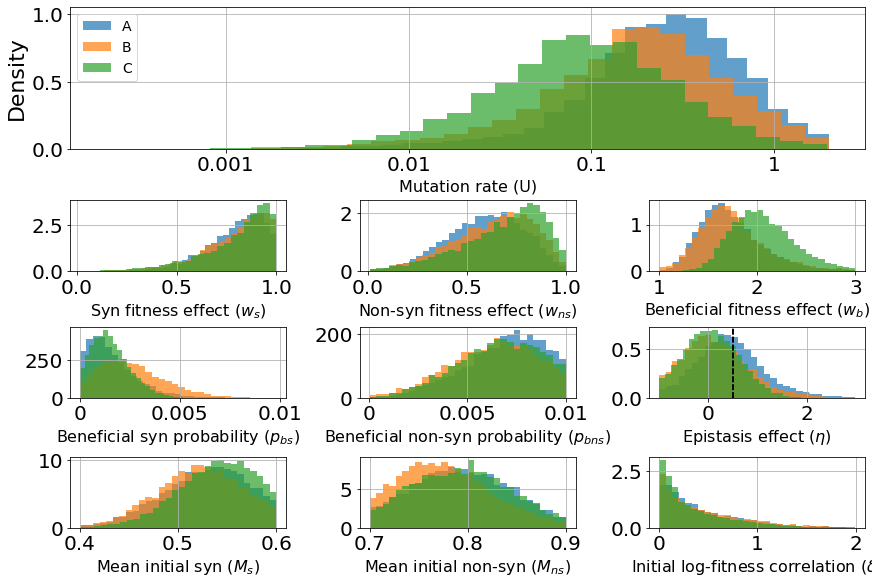

In [15]:
compare_posts_across_lines(inf_LR)

# L-LR Inference

In [16]:
inf_LLR = {}

In [17]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.495000 -9.703940e-01  1.346107   -0.050767  -0.655782  \
1            w_syn  0.902000  6.585465e-01  1.305505    0.999456   0.834824   
2        w_non_syn  0.807500  4.079482e-01  0.941475    0.942282   0.637480   
3            w_ada  1.764500  1.482705e+00  1.322298    2.141812   1.622219   
4        p_ada_syn  0.000378  8.478782e-07  1.632396    0.002163   0.000241   
5    p_ada_non_syn  0.005930  2.978067e-03  0.749316    0.009906   0.005159   
6           p0_syn  0.495000  4.207351e-01  0.633349    0.592488   0.468888   
7       p0_non_syn  0.817000  7.082685e-01  0.645334    0.882866   0.757177   
8        w_penalty  0.089850  7.181028e-05  0.806831    1.426179   0.001814   
9  epistasis_boost -0.137500 -9.995677e-01  1.134099    0.489635  -0.560385   

   hdi50_high     model  
0   -0.340278  ensemble  
1    0.947493  ensemble  
2    0.825468  ensemble  
3    1.841396  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [18]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.686500  -1.168230  1.718639   -0.247720  -0.882019  \
1            w_syn  0.873000   0.613863  1.176348    0.999763   0.798338   
2        w_non_syn  0.688000   0.240005  0.821244    0.888888   0.532433   
3            w_ada  1.740000   1.508241  1.496767    2.026388   1.682431   
4        p_ada_syn  0.001485   0.000008  1.472095    0.002577   0.000854   
5    p_ada_non_syn  0.006875   0.003391  0.775624    0.009999   0.005855   
6           p0_syn  0.509000   0.427448  0.653498    0.597876   0.478766   
7       p0_non_syn  0.797000   0.717909  0.627544    0.892025   0.762501   
8        w_penalty  0.068100   0.000003  1.234157    0.852181   0.001389   
9  epistasis_boost -0.297000  -0.997270  1.210003    0.437532  -0.561607   

   hdi50_high     model  
0   -0.567240  ensemble  
1    0.932079  ensemble  
2    0.767756  ensemble  
3    1.860472  ensemble  
4    0.001823  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [19]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.906500  -1.395563  2.082328   -0.446670  -1.057541  \
1            w_syn  0.936000   0.685605  1.341406    0.999976   0.859776   
2        w_non_syn  0.703000   0.319570  0.856291    0.937073   0.573514   
3            w_ada  1.946500   1.727174  1.386021    2.340337   1.923503   
4        p_ada_syn  0.000748   0.000004  1.784416    0.001748   0.000318   
5    p_ada_non_syn  0.006085   0.003205  0.762206    0.010000   0.005069   
6           p0_syn  0.495000   0.426134  0.657407    0.593083   0.487111   
7       p0_non_syn  0.803000   0.712156  0.626498    0.886559   0.767045   
8        w_penalty  0.008415   0.000001  1.466101    0.643459   0.000001   
9  epistasis_boost -0.320500  -0.999549  1.213839    0.381044  -0.689355   

   hdi50_high     model  
0   -0.739855  ensemble  
1    0.969960  ensemble  
2    0.788020  ensemble  
3    2.129344  ensemble  
4    0.001003  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


# Estimating $\mu$ - L-LR

In [20]:
mu_l = min(inf_LLR['A'][1].iloc[0,2] , inf_LLR['B'][1].iloc[0,2] , inf_LLR['C'][1].iloc[0,2])
mu_h = max(inf_LLR['A'][1].iloc[0,4] , inf_LLR['B'][1].iloc[0,4] , inf_LLR['C'][1].iloc[0,4])
mu_est = (inf_LLR['A'][1].iloc[0,1] + inf_LLR['B'][1].iloc[0,1] + inf_LLR['C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.16
 0.03 <= μ <= 0.77


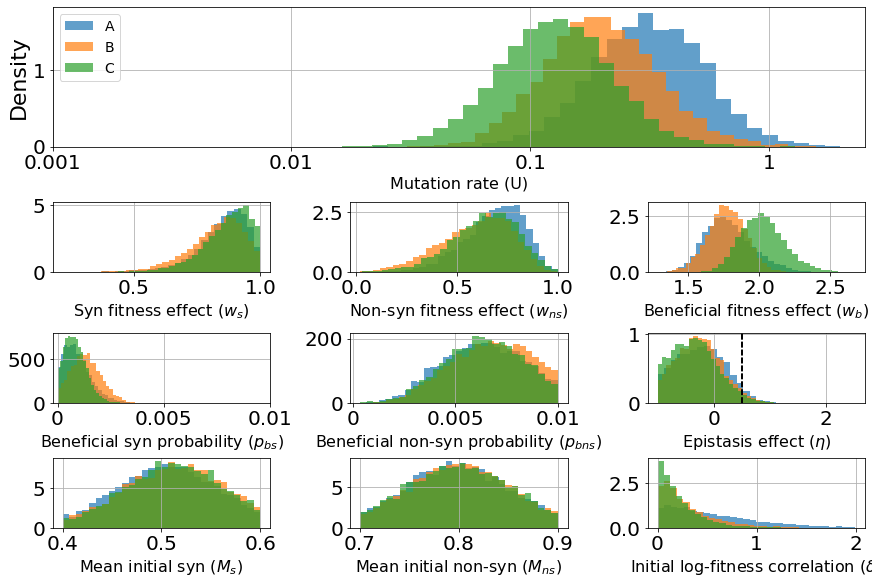

In [21]:
compare_posts_across_lines(inf_LLR)

# Pairwise Correlation for Estimated Model Parameters - L-LR

/tmp/ipykernel_2033159/2949537426.py:12: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
/tmp/ipykernel_2033159/2949537426.py:13: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad = 6, h_pad = 5)
/tmp/ipykernel_2033159/2949537426.py:22: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  k = kde.gaussian_kde([x,y])
/tmp/ipykernel_2033159/2949537426.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['low density'] + ['' for i in range(len(cbar.ax.get_yticklabels())-3)] +['high density'])


[Text(1, 0.0, 'low density'),
 Text(1, 1.0, ''),
 Text(1, 2.0, ''),
 Text(1, 3.0, ''),
 Text(1, 4.0, ''),
 Text(1, 5.0, 'high density'),
 Text(1, 6.0, '')]

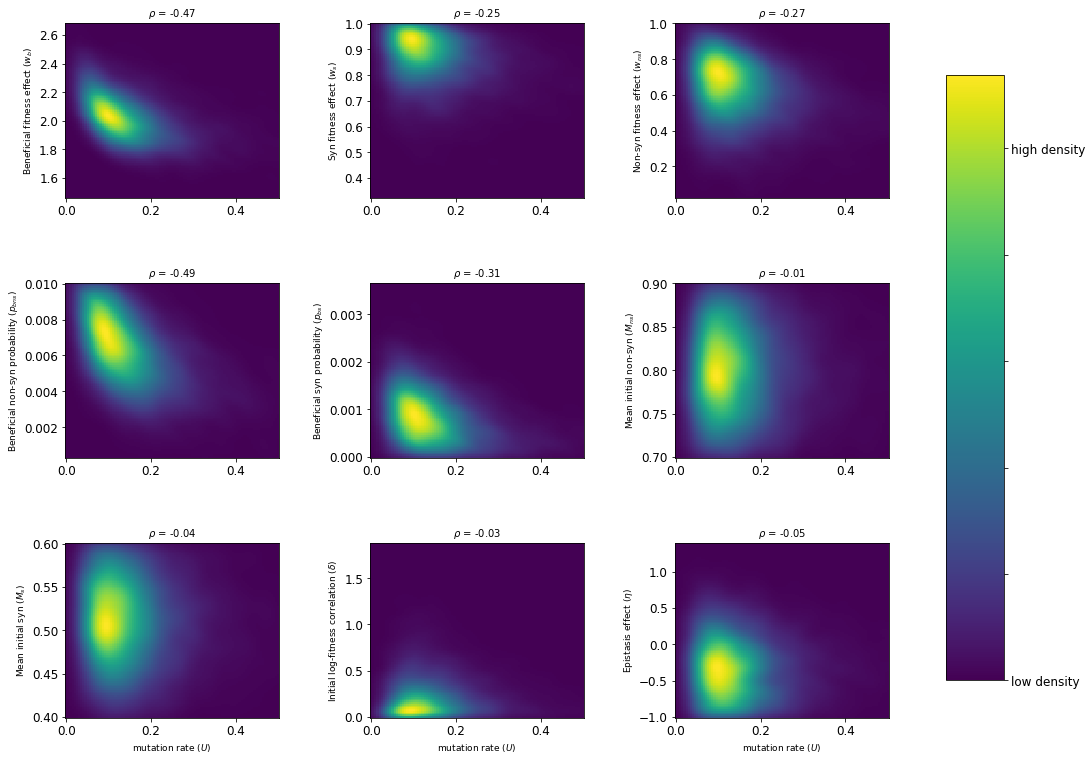

In [22]:
from scipy.stats import kde
from scipy.stats import pearsonr as corr
import matplotlib as mpl

label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['font.size'] = label_size
    
    
fig, ax = plt.subplots(3,3, constrained_layout=True, figsize=(16,12))
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
fig.tight_layout(pad = 6, h_pad = 5)
samples = inf_LLR[replica][0]



for i in range(1,len(samples.columns)):
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    x,y = np.power(10,samples.iloc[:,0]), samples.iloc[:,i]
    nbins=100
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[0:0.5:nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    # Make the plot
    cax=ax[(i-1)//3, (i-1)%3].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')
    ax[(i-1)//3, (i-1)%3].set_title(f'$\\rho$ = {round(corr(x,y)[0],2)}', fontsize=10)
    ax[2, (i-1)%3].set_xlabel('mutation rate ($U$)', fontsize=9)
    ax[(i-1)//3, (i-1)%3].set_ylabel(samples.columns[i], fontsize=9)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.ax.set_yticklabels(['low density'] + ['' for i in range(len(cbar.ax.get_yticklabels())-3)] +['high density'])  

# SR Inference

In [23]:
inf_SR = {}

In [24]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'A'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.72000  -1.812184  1.368478    0.105078  -1.077721  \
1            w_syn  0.93700   0.458681  0.970594    0.999988   0.804716   
2        w_non_syn  0.78700   0.261353  0.727690    0.987542   0.635296   
3            w_ada  2.01100   1.323929  0.713132    2.846297   1.785157   
4        p_ada_syn  0.00223   0.000007  0.868754    0.006187   0.000944   
5    p_ada_non_syn  0.00655   0.002655  0.718364    0.009999   0.005773   
6           p0_syn  0.55100   0.460324  0.760084    0.599978   0.520859   
7       p0_non_syn  0.79700   0.706425  0.636840    0.877775   0.760403   
8        w_penalty  0.02995   0.000011  1.066873    1.274318   0.000120   
9  epistasis_boost  0.17500  -0.999092  0.901412    1.287375  -0.390862   

   hdi50_high     model  
0   -0.390718  ensemble  
1    0.979520  ensemble  
2    0.913414  ensemble  
3    2.346498  ensemble  
4    0.003135  ensemble  
5    0.008813  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [25]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'B'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.82000  -1.951203  1.407069    0.219506  -1.124647  \
1            w_syn  0.94650   0.454012  0.970758    0.999952   0.819263   
2        w_non_syn  0.77700   0.239560  0.716397    0.983975   0.608829   
3            w_ada  2.19200   1.259356  0.691028    2.870298   1.837931   
4        p_ada_syn  0.00174   0.000027  0.772282    0.007082   0.001524   
5    p_ada_non_syn  0.00785   0.002618  0.714301    0.009998   0.005751   
6           p0_syn  0.55900   0.451562  0.730296    0.600000   0.516456   
7       p0_non_syn  0.76500   0.700488  0.649710    0.867037   0.740353   
8        w_penalty  0.04995   0.000036  0.982802    1.412884   0.000036   
9  epistasis_boost -0.05885  -0.994984  0.899524    1.395487  -0.364516   

   hdi50_high     model  
0   -0.337932  ensemble  
1    0.994085  ensemble  
2    0.910237  ensemble  
3    2.440060  ensemble  
4    0.004031  ensemble  
5    0.008825  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [26]:
errs = '5e-05'
sumstat_type = 'SR'
replica = 'C'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
inf_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.63500  -1.819354  1.345548    0.183752  -1.087595  \
1            w_syn  0.88800   0.432029  0.920817    0.999464   0.792699   
2        w_non_syn  0.79700   0.287690  0.742908    0.994394   0.607799   
3            w_ada  2.29450   1.399815  0.719957    2.919843   1.824341   
4        p_ada_syn  0.00173   0.000007  0.908729    0.005672   0.001019   
5    p_ada_non_syn  0.00797   0.002681  0.722802    0.009983   0.005565   
6           p0_syn  0.54500   0.445095  0.707147    0.599051   0.502812   
7       p0_non_syn  0.78900   0.702383  0.658656    0.872044   0.755598   
8        w_penalty  0.00901   0.000018  1.002633    1.420042   0.000093   
9  epistasis_boost -0.13050  -0.988969  0.949289    1.131104  -0.374259   

   hdi50_high     model  
0   -0.368987  ensemble  
1    0.983814  ensemble  
2    0.888110  ensemble  
3    2.404447  ensemble  
4    0.003051  ensemble  
5    0.008485  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [27]:
mu_l = min(inf_SR['A'][1].iloc[0,2] , inf_SR['B'][1].iloc[0,2] , inf_SR['C'][1].iloc[0,2])
mu_h = max(inf_SR['A'][1].iloc[0,4] , inf_SR['B'][1].iloc[0,4] , inf_SR['C'][1].iloc[0,4])
est = (inf_SR['A'][1].iloc[0,1] + inf_SR['B'][1].iloc[0,1] + inf_SR['C'][1].iloc[0,1]) / 3

print(10**est, 10**mu_l, 10**mu_h)

0.08550667128846837 0.014102672146735284 1.4154976595118864


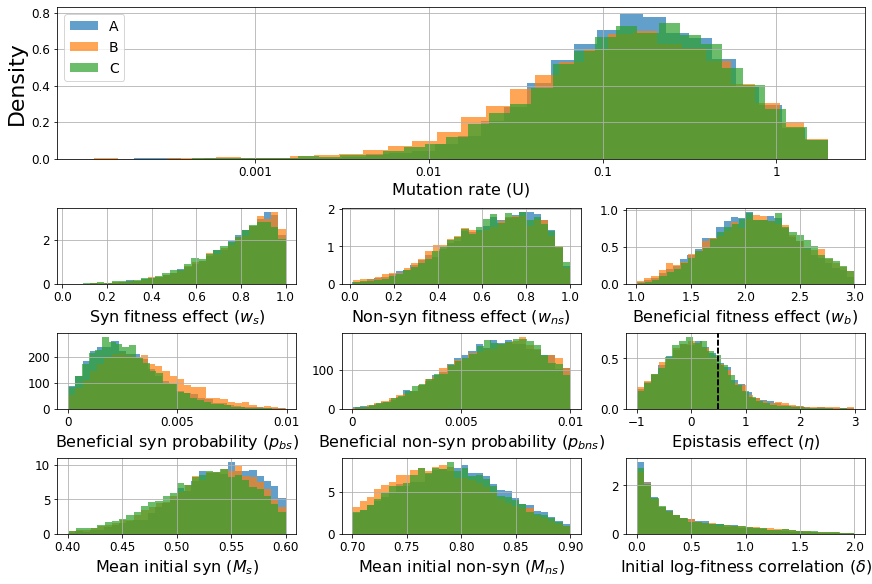

In [28]:
compare_posts_across_lines(inf_SR)

# L-LR inference - model with 2 passages per cycle

In [29]:
inf_LLR_DP = {}

In [30]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'A'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode     hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -1.14350 -1.857462e+00  1.771396   -0.032284  -1.312402  \
1            w_syn  0.94900  5.961764e-01  1.159386    0.999940   0.861693   
2        w_non_syn  0.70900  3.932181e-01  0.867341    0.999532   0.673726   
3            w_ada  1.48200  1.187621e+00  1.402175    1.765599   1.327049   
4        p_ada_syn  0.00007  3.782251e-09  1.587131    0.002294   0.000014   
5    p_ada_non_syn  0.00696  2.909893e-03  0.737206    0.009999   0.005713   
6           p0_syn  0.52300  4.251352e-01  0.638594    0.596211   0.476829   
7       p0_non_syn  0.78500  7.169921e-01  0.619615    0.894801   0.770181   
8        w_penalty  0.02965  3.885385e-05  1.178545    1.052906   0.001277   
9  epistasis_boost -0.30150 -9.997299e-01  0.937409    0.991910  -0.704539   

   hdi50_high     model  
0   -0.691682  ensemble  
1    0.996875  ensemble  
2    0.884308  ensemble  
3    1.534262  ensemble  
4    0.0008

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [31]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'B'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -0.85600  -1.699292  1.675125   -0.088312  -1.150755  \
1            w_syn  0.96050   0.636381  1.230467    0.999946   0.866808   
2        w_non_syn  0.65900   0.328033  0.843963    0.976247   0.581046   
3            w_ada  1.40700   1.069436  1.451087    1.615628   1.309797   
4        p_ada_syn  0.00096   0.000018  1.209030    0.003878   0.000900   
5    p_ada_non_syn  0.00637   0.002592  0.727262    0.009995   0.004795   
6           p0_syn  0.49500   0.419421  0.618345    0.593923   0.473424   
7       p0_non_syn  0.80900   0.716519  0.642862    0.890050   0.770061   
8        w_penalty  0.12450   0.000058  1.257051    0.848304   0.000955   
9  epistasis_boost  0.09255  -0.937748  0.916650    1.244225  -0.304375   

   hdi50_high     model  
0   -0.627106  ensemble  
1    0.992244  ensemble  
2    0.800033  ensemble  
3    1.500377  ensemble  
4    0.002171  ensemble  
5    0.007786  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


In [32]:
errs = '5e-05'
sumstat_type = 'L-LR'
replica = 'C'
ensemble_path = get_ensemble_path_double_passage(replica)
inf_LLR_DP['double passage '+replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low   
0               mu -1.139000 -2.232567e+00  2.122068   -0.241199  -1.362556  \
1            w_syn  0.852500  5.399446e-01  1.049532    0.999939   0.786005   
2        w_non_syn  0.847000  3.622603e-01  0.818659    0.999072   0.643725   
3            w_ada  1.470000  1.117895e+00  1.337048    1.787997   1.308338   
4        p_ada_syn  0.000836  9.113380e-08  1.284383    0.003426   0.000389   
5    p_ada_non_syn  0.006970  2.845442e-03  0.738691    0.010000   0.005419   
6           p0_syn  0.499000  4.214995e-01  0.628795    0.594009   0.468894   
7       p0_non_syn  0.795000  7.257159e-01  0.637989    0.898854   0.770539   
8        w_penalty  0.055050  1.822736e-05  1.505431    0.613068   0.000453   
9  epistasis_boost -0.113500 -9.998819e-01  1.032910    0.842293  -0.478868   

   hdi50_high     model  
0   -0.820847  ensemble  
1    0.952476  ensemble  
2    0.874095  ensemble  
3    1.520814  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


# Estimating $\mu$ - L-LR (2 passages)

In [33]:
mu_l = min(inf_LLR_DP['double passage A'][1].iloc[0,2] , inf_LLR_DP['double passage B'][1].iloc[0,2] , inf_LLR_DP['double passage C'][1].iloc[0,2])
mu_h = max(inf_LLR_DP['double passage A'][1].iloc[0,4] , inf_LLR_DP['double passage B'][1].iloc[0,4] , inf_LLR_DP['double passage C'][1].iloc[0,4])
mu_est = (inf_LLR_DP['double passage A'][1].iloc[0,1] + inf_LLR_DP['double passage B'][1].iloc[0,1] + inf_LLR_DP['double passage C'][1].iloc[0,1]) / 3

mu_l, mu_h, mu_est = round(10**mu_l,2), round(10**mu_h,2), round(10**mu_est,2)
print(f'μ_hat = {mu_est}\n {mu_l} <= μ <= {mu_h}')

μ_hat = 0.07
 0.01 <= μ <= 0.6


## Fig 4A (without FITS)

In [34]:
def plot_post_estimates(ax, double_passage=False):
    # fits_post = pd.read_table('FITS/FITS_post.tsv')
    sample_size = 10000
    bin_num = 30
    alpha = 0.6
    # fits_post.log_U.sample(sample_size).hist(bins=bin_num, ax=ax, label='FITS', density=True, color=sns.color_palette()[7])
    all_posts['SR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='SR', 
                                                               density=True,ax=ax)
    all_posts['LR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='LR', 
                                                               density=True, ax=ax)
    all_posts['L-LR']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='L-LR', 
                                                                 density=True, ax=ax)
    if double_passage:
        all_posts['L-LR double passage']['Mutation rate (U)'].sample(sample_size).hist(bins=bin_num, alpha=alpha, label='L-LR - double passage', 
                                                                 density=True, ax=ax)
    xticks = [-3,-2,-1, 0, 1]
    ax.set_xticks(xticks)
    ax.set_xticklabels([10**x for x in xticks])
    ax.set_yticks([0,0.5,1,1.5])
    ax.legend()
    ax.set_xlabel('Mutation rate (U)')

def compare_posts_for_paper(posts, title_suffix='', colors=None, alpha=0.7, mu_xticks=(-3,1), legend_loc=(0.42,0.46), panel=None):
    mosaic = """
        AAA
        AAA
        BCD
        EFG
        """
    fig = plt.figure(constrained_layout=True, figsize=(16,12))
    ax_dict = fig.subplot_mosaic(mosaic)
    if panel!=None:
        ax_dict['A'].set_title(f'({panel})\n', fontsize=20, loc='left')
    param_to_plot_dict = {'Mutation rate (U)': 'A', r'Syn fitness effect ($w_{s}$)': 'B',
                          r'Non-syn fitness effect ($w_{ns}$)': 'C', 
                          r'Beneficial syn probability ($p_{bs}$)': 'E', 
                          r'Beneficial fitness effect ($w_{b}$)': 'D', 
                          r'Epistasis effect ($\eta$)': 'G', 
                          r'Beneficial non-syn probability ($p_{bns}$)': 'F'}
    if not colors:
        colors = sns.color_palette(None)
    legend = True
    for col_name, ax_index in param_to_plot_dict.items():
        ax = ax_dict[ax_index]
        if 'Mutation' in col_name:
            col = 'err'
            double_passage=False
            if len(posts.keys())>3:
                double_passage=True
            plot_post_estimates(ax,double_passage)
        else:
            col = 'rel_err'
            for i, (name, df) in enumerate(posts.items()):
                df[col_name].hist(bins=20, label=name if legend else '_nolegend', ax=ax, alpha=alpha, color=colors[i], density=True)
                if 'probability' in col_name:
                    xticks = [0, 0.005, 0.01]
                    ax.set_xticks(xticks)
                    ax.set_xticklabels(xticks)
                if 'stasis' in col_name:
                    ax.axvline(0.5, ls='--', color='k')    
            ax.set_xlabel(col_name)
            fig.supylabel('Density', fontsize=30)
            legend = False
    

In [35]:
all_posts = {'SR': pd.concat([x[0] for x in inf_SR.values()]),
             'LR': pd.concat([x[0] for x in inf_LR.values()]),
             'L-LR': pd.concat([x[0] for x in inf_LLR.values()]),
            'L-LR double passage': pd.concat([x[0] for x in inf_LLR_DP.values()])}

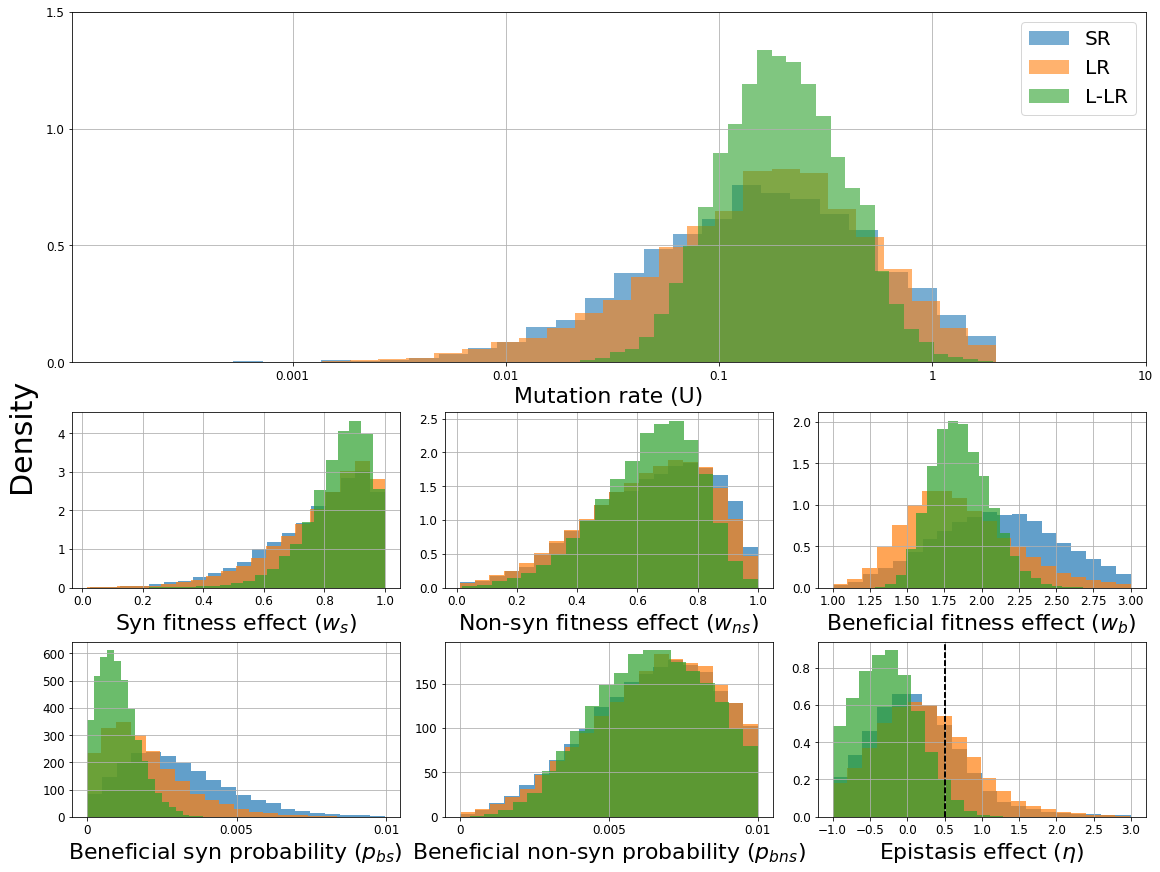

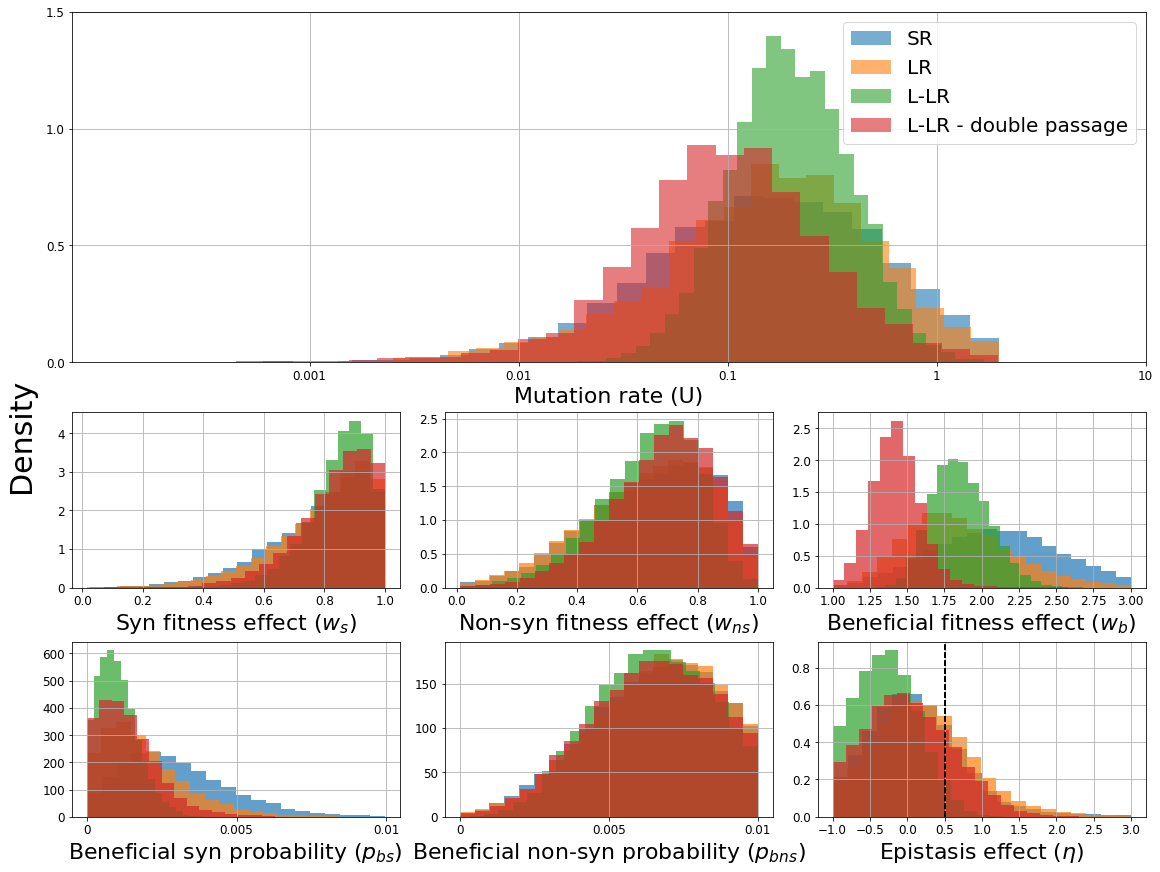

In [36]:
# Original fig4a
fig4a = compare_posts_for_paper({'SR': all_posts['SR'], 'LR': all_posts['LR'], 'L-LR': all_posts['L-LR']})
# Supp fig4a - with modified model
fig4sup = compare_posts_for_paper({'SR': all_posts['SR'], 'LR': all_posts['LR'], 'L-LR': all_posts['L-LR'], 'L-LR - double passage': all_posts['L-LR double passage']})


## Table 1 + Table S2 data

In [41]:
all_posts_tmp = {k :v.rename(columns={v:k for k,v in rename_dict.items()}) for k,v in all_posts.items()}
stats = {k : calc_stats(v, None, prior) for k,v in all_posts_tmp.items()}
for k, v in stats.items():
    for param in v.param.unique():
        print(k)
        print(param)
        print(v[v.param==param][['hdi95_low', 'mode', 'hdi95_high']])

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

SR
mu
   hdi95_low   mode  hdi95_high
0  -1.837667 -0.817    0.190504
SR
w_ada
   hdi95_low   mode  hdi95_high
1   1.353917  1.917    2.919198
SR
w_syn
   hdi95_low   mode  hdi95_high
2   0.448635  0.936    0.999974
SR
w_non_syn
   hdi95_low   mode  hdi95_high
3   0.268665  0.807    0.990262
SR
p_ada_non_syn
   hdi95_low     mode  hdi95_high
4   0.002715  0.00675    0.009996
SR
p_ada_syn
      hdi95_low     mode  hdi95_high
5  5.223809e-07  0.00215    0.006335
SR
p0_non_syn
   hdi95_low   mode  hdi95_high
6   0.705521  0.777    0.874085
SR
p0_syn
   hdi95_low   mode  hdi95_high
7   0.454286  0.553    0.599987
SR
w_penalty
   hdi95_low  mode  hdi95_high
8    0.00002  0.05    1.349327
SR
epistasis_boost
   hdi95_low   mode  hdi95_high
9  -0.998876  0.219    1.243093
LR
mu
   hdi95_low    mode  hdi95_high
0  -1.881174 -0.7315    0.162901
LR
w_ada
   hdi95_low  mode  hdi95_high
1   1.217834  1.77    2.613342
LR
w_syn
   hdi95_low   mode  hdi95_high
2   0.472251  0.917    0.999996
LR
w_non_

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))


# Large Errors (10x loop errs)

In [151]:
large_errs_LLR = {}

In [152]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.853500  -1.435542  1.857084   -0.262333  -1.082482   
1            w_syn  0.860000   0.655945  1.270238    0.999023   0.804427   
2        w_non_syn  0.493500   0.108994  0.862253    0.704020   0.343183   
3            w_ada  1.846500   1.557426  1.349447    2.189240   1.735053   
4        p_ada_syn  0.000806   0.000008  1.812183    0.001714   0.000445   
5    p_ada_non_syn  0.007845   0.004060  0.832430    0.009999   0.006725   
6           p0_syn  0.475000   0.419209  0.637174    0.590368   0.473081   
7       p0_non_syn  0.789000   0.709335  0.637936    0.881592   0.767292   
8        w_penalty  0.389000   0.000403  0.845939    1.321483   0.178449   
9  epistasis_boost -0.573500  -0.999315  1.193038    0.425197  -0.802631   

   hdi50_high     model  
0   -0.669465  ensemble  
1    0.920712  ensemble  
2    0.559429  ensemble  
3    1.944895  ensemble  
4    0.001088  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [153]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.409000 -8.037775e-01  1.155919    0.077305  -0.506839   
1            w_syn  0.684000  4.828144e-01  1.209941    0.861395   0.615690   
2        w_non_syn  0.295500  5.837903e-02  1.079518    0.496312   0.198101   
3            w_ada  1.767500  1.546181e+00  1.406736    2.115768   1.696671   
4        p_ada_syn  0.000767  4.197219e-08  1.830713    0.001672   0.000298   
5    p_ada_non_syn  0.002345  6.553151e-04  1.151159    0.004832   0.001704   
6           p0_syn  0.497000  4.017241e-01  0.638974    0.575242   0.447729   
7       p0_non_syn  0.797000  7.078071e-01  0.612076    0.884147   0.761173   
8        w_penalty  1.857500  8.726065e-01  0.936508    1.999938   1.622154   
9  epistasis_boost -0.196500 -9.932035e-01  1.129897    0.586280  -0.396828   

   hdi50_high     model  
0   -0.211038  ensemble  
1    0.746650  ensemble  
2    0.358075  ensemble  
3    1.897344  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [154]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'L-LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LLR[replica] = infer_and_plot(ensemble_path, loop_coding_man[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode     hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.751500 -1.285862e+00  1.469954   -0.018443  -0.902104   
1            w_syn  0.879500  7.051079e-01  1.384568    0.999760   0.805396   
2        w_non_syn  0.423000  1.286107e-01  0.981512    0.641798   0.332962   
3            w_ada  1.958500  1.593024e+00  1.300471    2.257011   1.826765   
4        p_ada_syn  0.000788  9.783747e-07  1.816958    0.001674   0.000344   
5    p_ada_non_syn  0.005180  2.086913e-03  0.840398    0.008480   0.003646   
6           p0_syn  0.473000  4.023889e-01  0.614203    0.575125   0.450331   
7       p0_non_syn  0.813000  7.046201e-01  0.622538    0.878777   0.757806   
8        w_penalty  1.651000  6.299592e-01  0.773454    1.999781   1.441940   
9  epistasis_boost -0.379000 -9.984577e-01  1.210535    0.410783  -0.716652   

   hdi50_high     model  
0   -0.498815  ensemble  
1    0.910285  ensemble  
2    0.511873  ensemble  
3    2.054470  ensemble  


/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

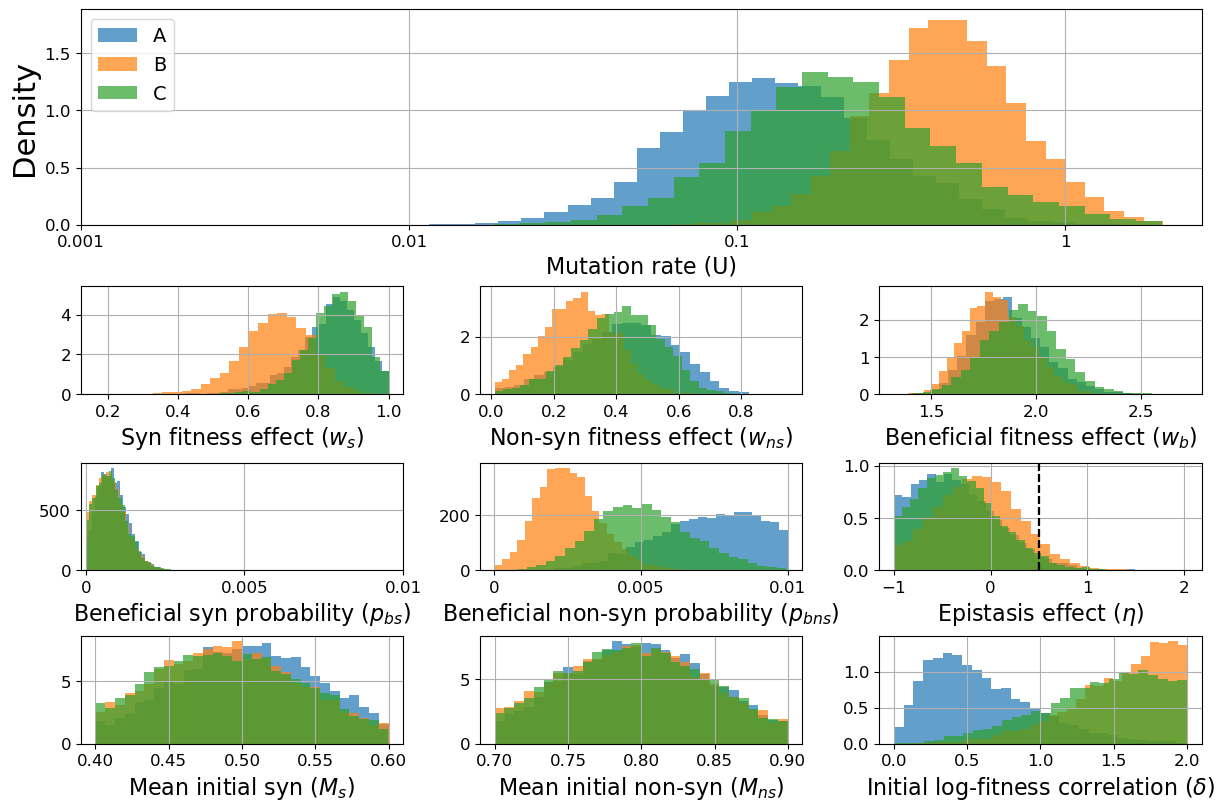

In [155]:
compare_posts_across_lines(large_errs_LLR)

## Fig 4B + S?

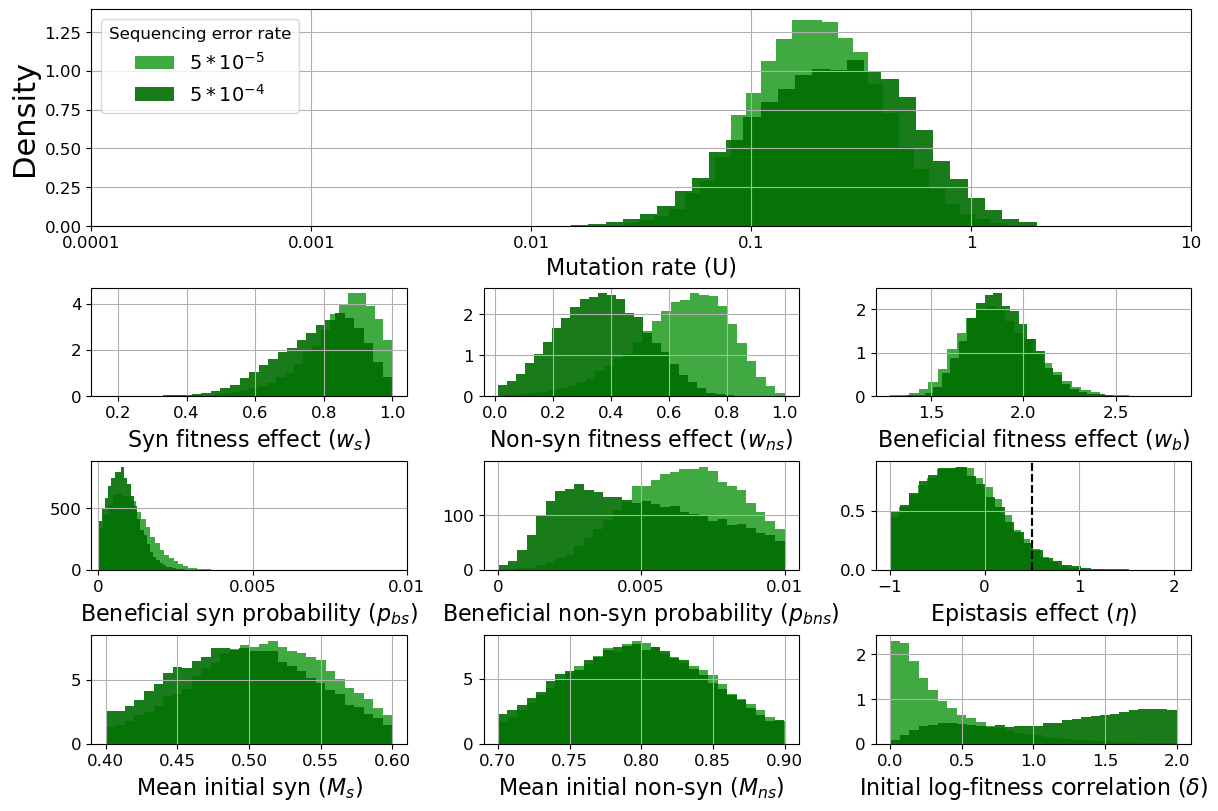

In [157]:
man_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_LLR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_LLR.values()])}
not_C2 = [max(x-0.2,0) for x in sns.color_palette()[2]]
a=compare_posts(man_errs, mu_xticks=(-4,2), legend_title='Sequencing error rate',
                             colors=['C2', not_C2], alpha=0.9)
a.savefig('figs9.tif',bbox_inches='tight', dpi=500)
# b = 
# fig = plt.figure()
# fig.axes.append(b)
# fig.savefig('b.png')

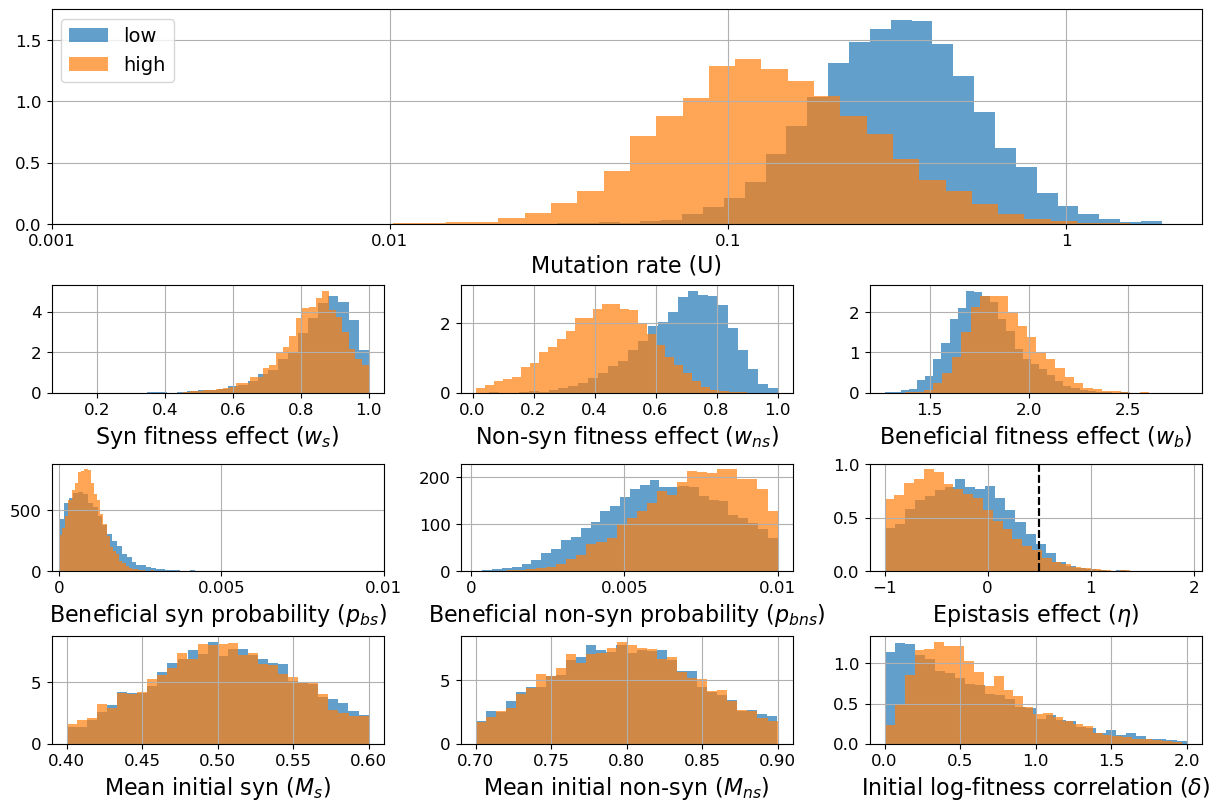

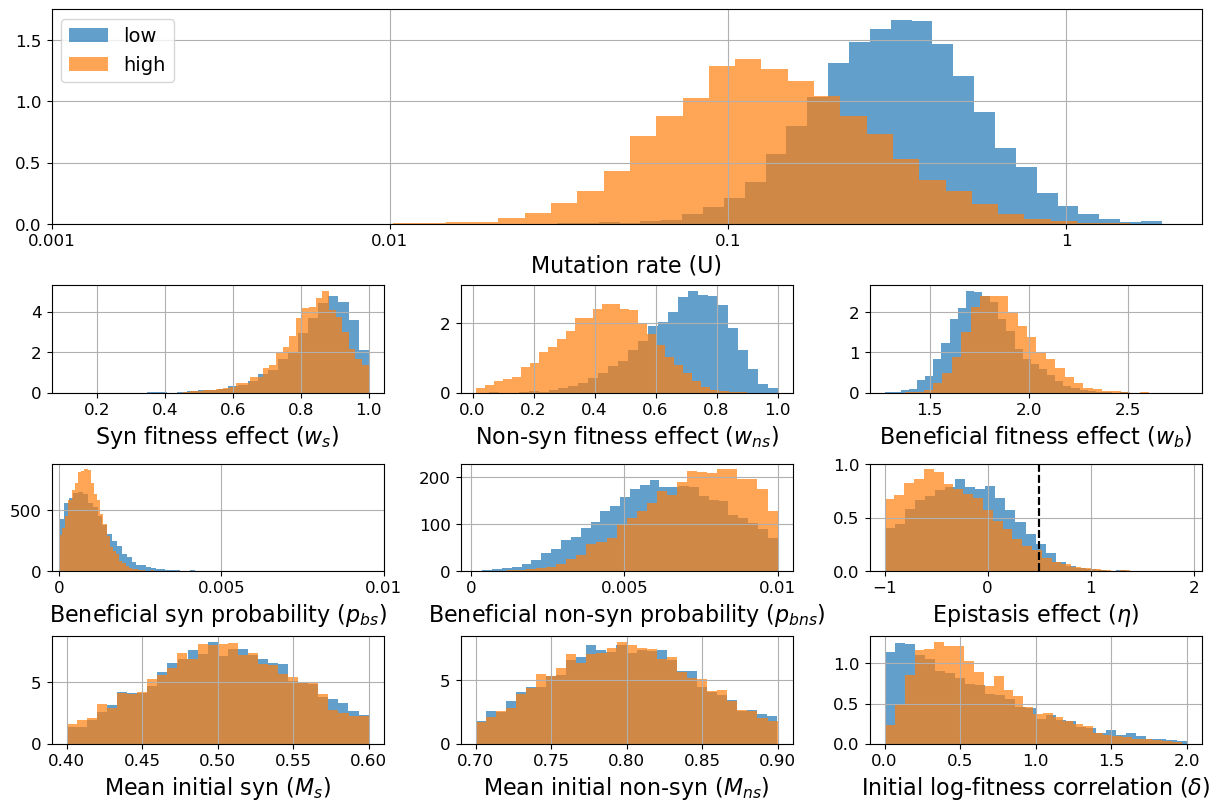

In [54]:
replica = 'A'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})


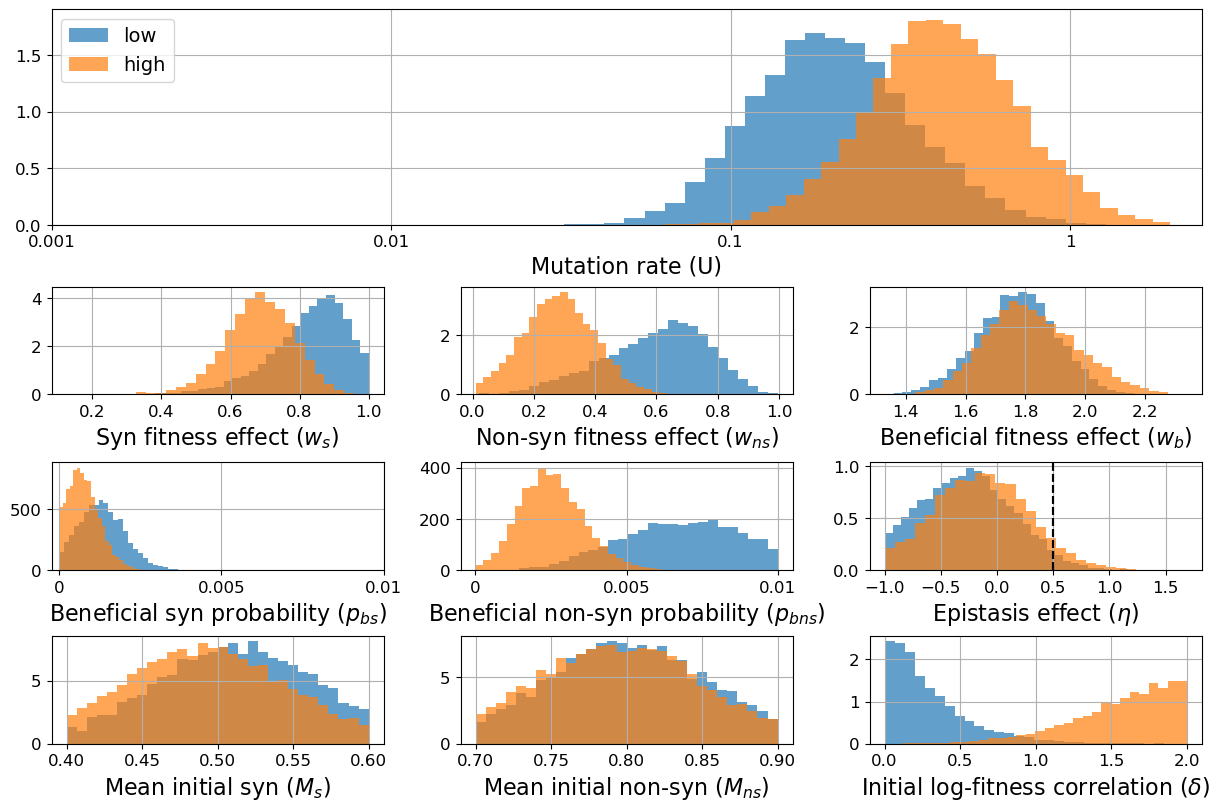

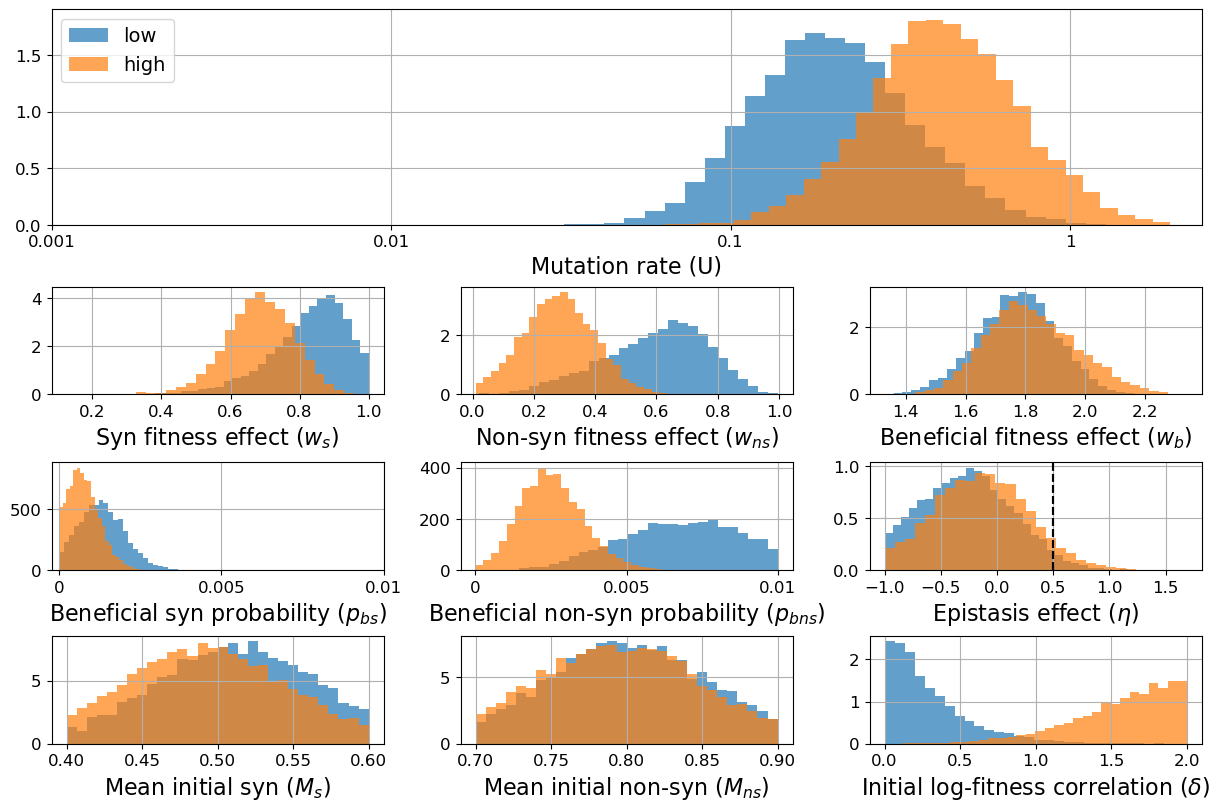

In [55]:
replica = 'B'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})

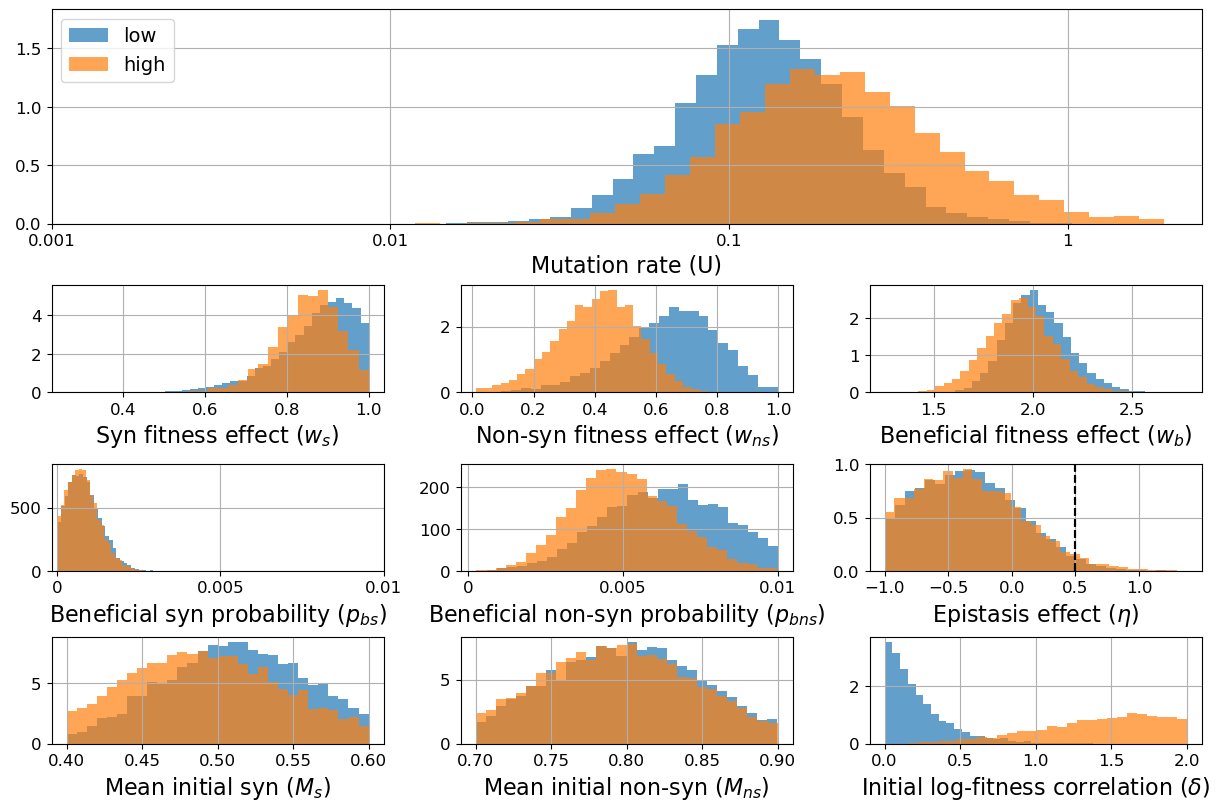

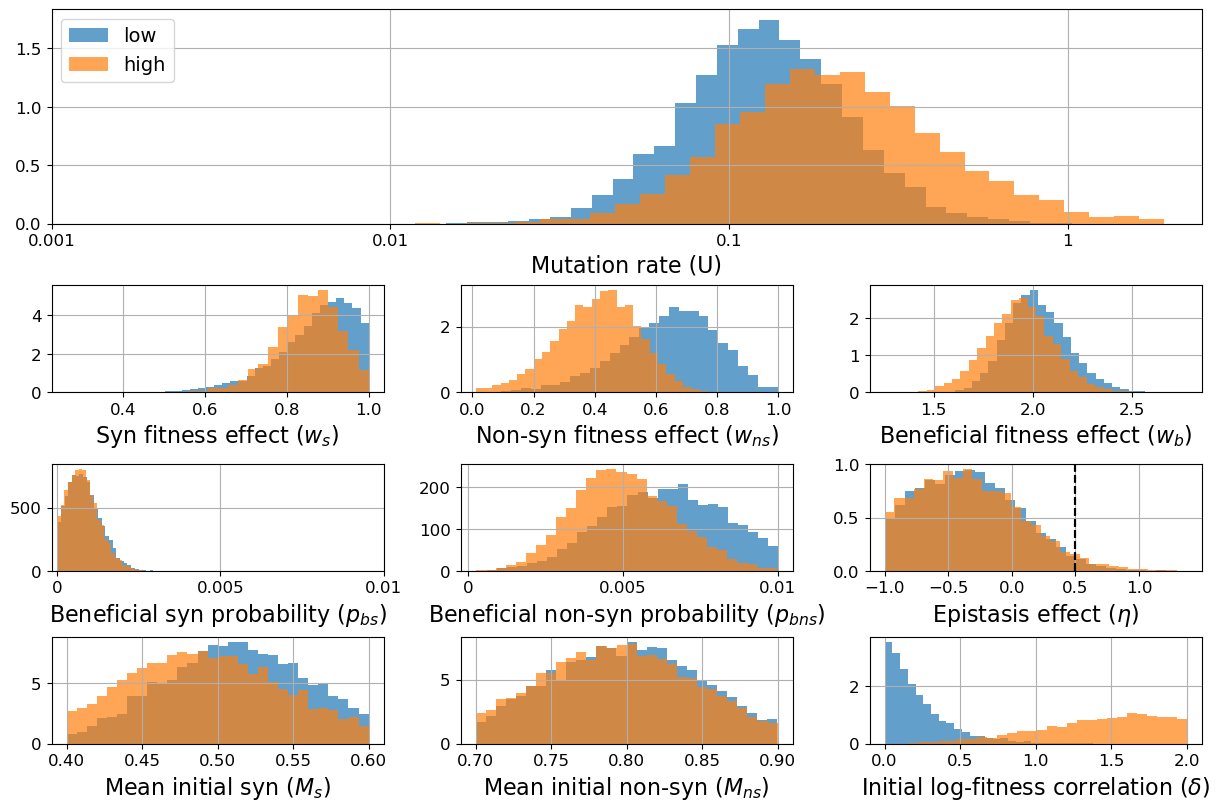

In [56]:
replica = 'C'
compare_posts({'low': inf_LLR[replica][0], 'high': large_errs_LLR[replica][0]})

In [57]:
large_errs_LR = {}

In [58]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -3.00800  -3.888615  6.404490   -2.244193  -3.435286   
1            w_syn  0.82900   0.477048  1.012968    0.968712   0.714271   
2        w_non_syn  0.39550   0.019824  0.723426    0.716481   0.171664   
3            w_ada  2.77800   2.335598  1.245304    2.999765   2.614724   
4        p_ada_syn  0.00291   0.000307  0.932935    0.005889   0.001660   
5    p_ada_non_syn  0.00689   0.003032  0.744423    0.009990   0.005871   
6           p0_syn  0.54900   0.454943  0.718551    0.599807   0.508306   
7       p0_non_syn  0.82300   0.734396  0.655725    0.899851   0.785365   
8        w_penalty  0.21000   0.032950  1.131971    1.007001   0.146447   
9  epistasis_boost  1.67250   0.761825  0.991800    2.795830   1.418628   

   hdi50_high     model  
0   -2.869276  ensemble  
1    0.879398  ensemble  
2    0.477129  ensemble  
3    2.885526  ensemble  
4    0.003631  ensemble  
5    0.008619  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [59]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param      mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.893500  -1.692916  1.871741   -0.267269  -1.192207   
1            w_syn  0.848000   0.529885  1.149628    0.955470   0.777896   
2        w_non_syn  0.274000   0.036203  0.875262    0.593585   0.197126   
3            w_ada  1.919000   1.377974  0.953885    2.486997   1.713923   
4        p_ada_syn  0.003430   0.000674  0.896413    0.006421   0.002210   
5    p_ada_non_syn  0.006575   0.002697  0.716256    0.009996   0.005890   
6           p0_syn  0.495000   0.404339  0.645736    0.574265   0.450813   
7       p0_non_syn  0.785000   0.717896  0.633352    0.892268   0.761605   
8        w_penalty  0.836000   0.240608  0.681337    1.835972   0.608414   
9  epistasis_boost  1.019500   0.505002  1.550690    1.696785   0.891972   

   hdi50_high     model  
0   -0.706414  ensemble  
1    0.909196  ensemble  
2    0.422252  ensemble  
3    2.086787  ensemble  
4    0.004276  ensemble  
5    0.

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [60]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'LR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_LR[replica] = infer_and_plot(ensemble_path, loop_coding[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.09385  -0.515107  0.742398    0.286172  -0.174260   
1            w_syn  0.56850   0.349014  1.008462    0.816241   0.528433   
2        w_non_syn  0.17950   0.010139  1.175445    0.384283   0.077746   
3            w_ada  1.35100   1.075224  1.282272    1.756983   1.227663   
4        p_ada_syn  0.00235   0.000088  0.820676    0.006698   0.001893   
5    p_ada_non_syn  0.00816   0.003502  0.802033    0.009999   0.006634   
6           p0_syn  0.47500   0.400107  0.639825    0.567676   0.438585   
7       p0_non_syn  0.76900   0.713053  0.621506    0.887985   0.768321   
8        w_penalty  1.85350   0.668090  0.793675    1.999694   1.405884   
9  epistasis_boost -0.02815  -0.999859  0.885972    1.339512  -0.553383   

   hdi50_high     model  
0    0.126509  ensemble  
1    0.705885  ensemble  
2    0.217454  ensemble  
3    1.463604  ensemble  
4    0.004210  ensemble  
5    0.009239  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

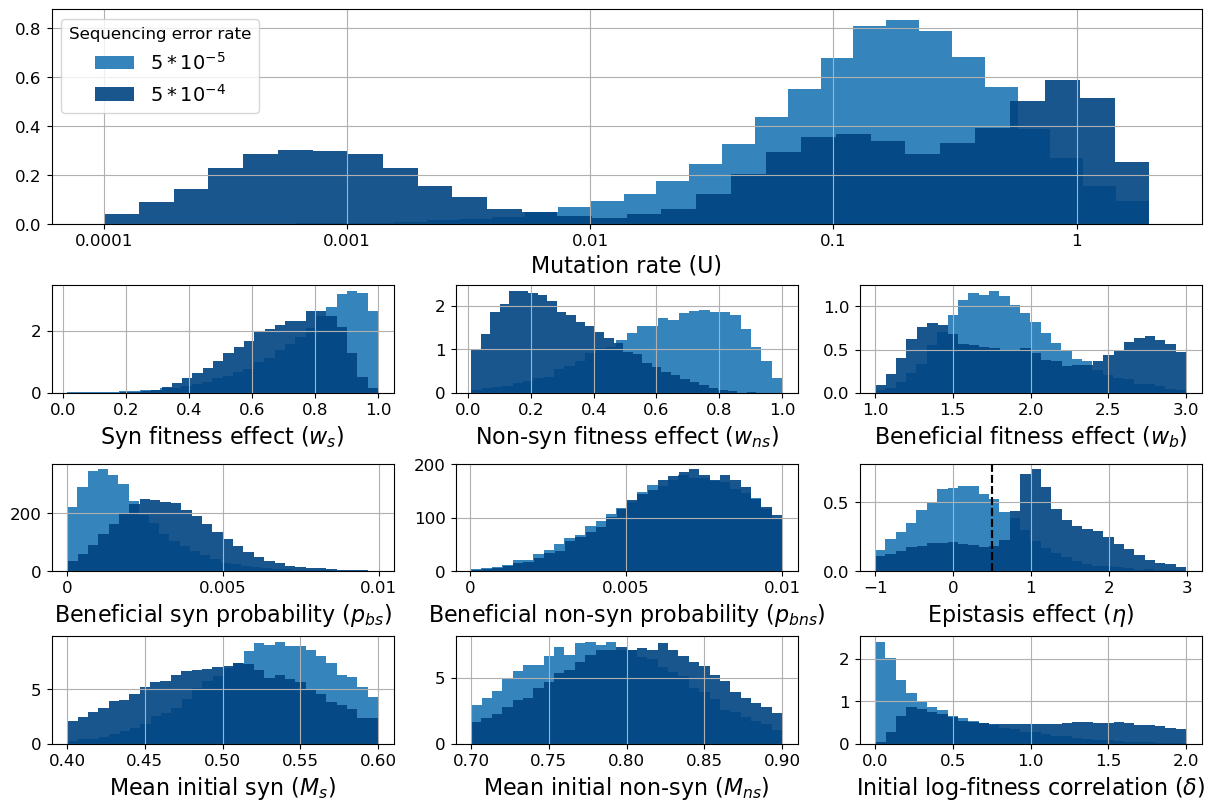

In [67]:
LR_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_LR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_LR.values()])}
not_C0 = [max(x-0.2,0) for x in sns.color_palette()[0]]
figs4 = compare_posts(LR_errs, mu_xticks=(-4,1), legend_title='Sequencing error rate',
                             colors=['C0', not_C0], alpha=0.9)
figs4.savefig('figs4.pdf')

In [62]:
large_errs_SR = {}

In [63]:
errs = '5e-04'
replica = 'A'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)


Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -3.22600  -3.999890  5.904867   -1.817199  -3.681195   
1            w_syn  0.88800   0.499266  0.993399    0.999512   0.756807   
2        w_non_syn  0.34850   0.028109  0.705931    0.757849   0.176257   
3            w_ada  2.39000   1.471908  0.676853    2.999855   1.935727   
4        p_ada_syn  0.00245   0.000020  0.686355    0.008097   0.001411   
5    p_ada_non_syn  0.00525   0.001797  0.658169    0.009922   0.004492   
6           p0_syn  0.54700   0.463770  0.762975    0.599909   0.521748   
7       p0_non_syn  0.83100   0.738431  0.664990    0.899988   0.812272   
8        w_penalty  0.21600   0.066196  1.129359    1.107937   0.149907   
9  epistasis_boost  2.14450   1.150015  0.993064    2.997169   1.714829   

   hdi50_high     model  
0   -2.823079  ensemble  
1    0.927860  ensemble  
2    0.493259  ensemble  
3    2.620602  ensemble  
4    0.004404  ensemble  
5    0.007794  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [64]:
errs = '5e-04'
replica = 'B'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -1.27500  -2.295187  1.987536   -0.071204  -1.576468   
1            w_syn  0.86350   0.497555  1.134627    0.956018   0.775894   
2        w_non_syn  0.41900   0.057730  0.838732    0.643534   0.228609   
3            w_ada  2.77100   1.451225  0.676375    2.999751   2.178272   
4        p_ada_syn  0.00425   0.000914  0.783668    0.007895   0.002683   
5    p_ada_non_syn  0.00698   0.002835  0.739237    0.009988   0.005497   
6           p0_syn  0.46900   0.400382  0.619314    0.574113   0.450646   
7       p0_non_syn  0.81700   0.711711  0.628838    0.886875   0.763143   
8        w_penalty  1.25550   0.239477  0.668952    1.844132   0.496765   
9  epistasis_boost  0.76000  -0.283563  1.003420    2.024734   0.477358   

   hdi50_high     model  
0   -0.824395  ensemble  
1    0.906413  ensemble  
2    0.477290  ensemble  
3    2.821024  ensemble  
4    0.005268  ensemble  
5    0.008248  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

In [65]:
errs = '5e-04'
replica = 'C'
sumstat_type = 'SR'
ensemble_path = get_ensemble_path(errs, replica, sumstat_type)
large_errs_SR[replica] = infer_and_plot(ensemble_path, loop_coding_short[replica], man_sumstat=loop_coding_man[replica],
                                   sumstats_to_simulate=10, plot_hdi=False, plot_freqs=False, plot_short_PPC=False,
                                   plot_long_PPC=False, samples_per_model=1000, syn_prob=syn_prob)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

             param     mode  hdi95_low       DKL  hdi95_high  hdi50_low  \
0               mu -0.11600  -0.781052  0.786309    0.280525  -0.389197   
1            w_syn  0.53250   0.285815  0.880990    0.837206   0.456330   
2        w_non_syn  0.12050   0.010096  1.167863    0.409086   0.044725   
3            w_ada  2.55650   1.788658  0.837408    2.999983   2.255304   
4        p_ada_syn  0.00385   0.000991  0.865736    0.007275   0.002570   
5    p_ada_non_syn  0.00746   0.003322  0.789605    0.010000   0.006490   
6           p0_syn  0.50900   0.406630  0.600800    0.586497   0.455432   
7       p0_non_syn  0.81100   0.701743  0.592667    0.880096   0.754951   
8        w_penalty  1.35600   0.441029  0.671389    1.988270   0.839290   
9  epistasis_boost -0.49050  -0.999176  1.173050    0.459337  -0.680569   

   hdi50_high     model  
0    0.009422  ensemble  
1    0.672013  ensemble  
2    0.177267  ensemble  
3    2.744693  ensemble  
4    0.004753  ensemble  
5    0.009058  ens

/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered in multiply
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: divide by zero encountered in log
  divergence = np.sum(np.where(P!=0, P*np.log(P/Q), 0))
/home/jupyter-nadavbennun/Nadav/Itamar/ms2-mutation-rate/utils.py:60: RuntimeWarning: invalid value encountered 

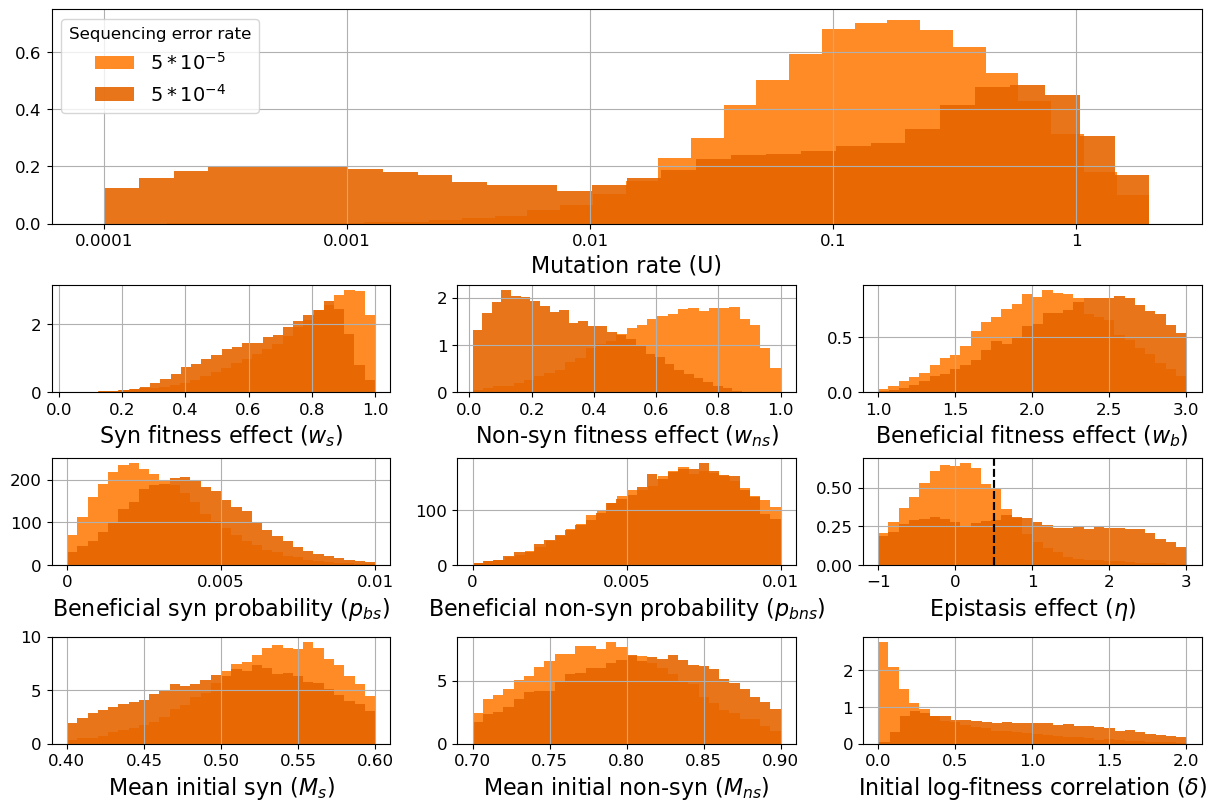

In [68]:
SR_errs = {r'$5*10^{-5}$': pd.concat([x[0] for x in inf_SR.values()]),
            r'$5*10^{-4}$': pd.concat([x[0] for x in large_errs_SR.values()])}
not_C1 = [max(x-0.1,0) for x in sns.color_palette()[1]]
figs5 = compare_posts(SR_errs, mu_xticks=(-4,1), legend_title='Sequencing error rate',
                             colors=['C1', not_C1], alpha=0.9)
figs5.savefig('figs5.pdf')